In [245]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString as ls
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
import scipy.constants as con
from scipy import stats
e = 2.718281828

# Teil 1 

## 1.0 Allgemeines

In [4]:
transfer = pd.read_csv("Data/QM1/initial setup/spectrum.dat",sep=' ',decimal=".",header=None)
transfer

,0,1
0,10.0,0.465
1,20.0,0.411
2,30.0,0.662
3,40.0,0.596
4,50.0,0.596
...,...,...
975,9960.0,0.364
976,9970.0,0.358
977,9980.0,0.362
978,9990.0,0.360


47      480.0
197    2020.0
453    4630.0
Name: 0, dtype: float64

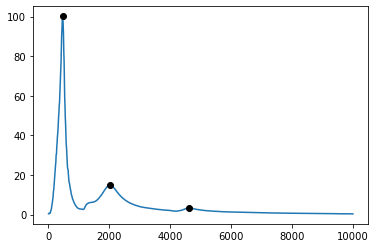

In [104]:
plt.plot(transfer[0],transfer[1],zorder=0)
x=transfer[0]
y=transfer[1]

peaks = find_peaks(y,height=0, width=9) 
height = peaks[1]['peak_heights']
peak_pos = x[peaks[0]]
plt.scatter(peak_pos , height,c="k")
peak_pos

## 1.1 der Rohrresonator

In [70]:
r15 = pd.read_csv("Data/QM1/Teil1/150mm.dat",sep=' ',decimal=".",header=None)
r60 = pd.read_csv("Data/QM1/Teil1/600mm.dat",sep=' ',decimal=".",header=None)
r15oszi = [[470,2000,4600],[1,3,4]]

array([ 3.26297476, 14.28067091, 20.34988399, 10.33449693, 12.28227918,
        8.99277898,  9.25708172,  9.82290674, 10.3972179 , 10.65136799,
       11.05806812, 13.90420039, 18.43596257, 23.88504897, 30.81601685,
        8.53553262, 14.57712802, 11.81349165, 11.3096911 , 18.64379145,
       14.90258281, 18.55786413, 23.86687267])

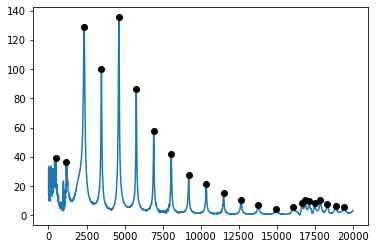

In [246]:
plt.plot(r15[0],r15[1],zorder=0)
x=r15[0]
y=r15[1]
peaks , _ = find_peaks(y,height=4, width=9) 
# height = peaks[1]['peak_heights']
peak_pos1 = x[peaks]
# peaks , _= find_peaks(y,height=4, width=9) 
results_lambda1 = peak_widths(y, peaks, rel_height=1/e)
plt.scatter(x[peaks] , y[peaks],c="k")


#plt.hlines(*results_lambda[1:])

axes = plt.gca()
# axes.set_xlim(15000,20000)
# axes.set_ylim(0,150)
results_lambda1[0]

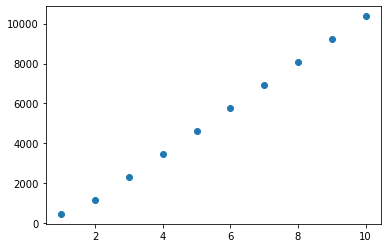

In [247]:
plt.scatter(np.add(range(len(peak_pos1[0:10])),1),peak_pos1[0:10])

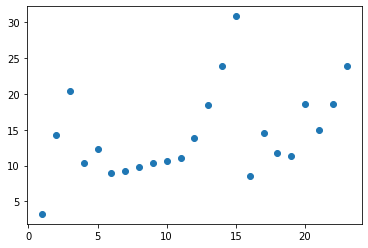

In [249]:
plt.scatter(np.add(range(len(results_lambda1[0])),1),results_lambda1[0])

array([ 5.75346646, 10.22743723,  8.5385668 ,  5.55901944,  5.09993683,
        5.78527186,  6.34453845, 10.45251293,  6.8747599 ,  5.65618361,
        5.42141355,  5.807282  ,  5.28288466,  5.37427398,  5.26211311,
        5.26384072,  6.32485344,  5.33500003,  5.61365186,  5.83520385,
        5.54528335,  5.60905414,  5.67319031,  5.95455649,  5.87921264,
        5.99864762,  6.65323887,  6.09257769,  6.54085111,  6.57047684,
        6.68037989,  6.57031642,  6.80146721,  6.85459545,  7.1424662 ,
        6.83470672,  7.14590952,  6.49198549,  7.55839622,  6.85301179,
        8.65011456,  6.89557576,  8.34569366,  7.73784368,  9.27375918,
        7.32627364, 10.32043705,  8.33945531, 11.65811322,  8.12882821,
       13.77768016, 14.84426849,  8.71408988,  8.20243753, 13.59318051,
        8.54259175, 18.2334669 , 11.7757003 ,  5.26577873,  4.49830363,
        5.85865539,  5.09543377,  6.34093082,  9.67157944,  6.48270449,
        5.22914206,  6.08959198,  6.39763595,  4.74864625,  8.81

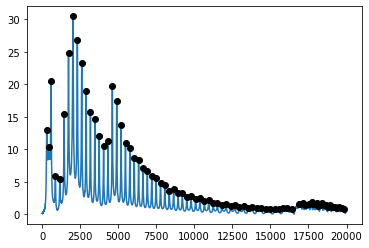

In [421]:
plt.plot(r60[0],r60[1],zorder=0)
x=r60[0]
y=r60[1]
# peaks = find_peaks(y,height=0, width=6) 
# height = peaks[1]['peak_heights']
# peak_pos2 = x[peaks[0]]
# plt.scatter(peak_pos2[0:58] , height[0:58],c="k")
# peak_pos2[0:58]
peaks , _ = find_peaks(y,height=0, width=6) 
# height = peaks[1]['peak_heights']
peak_pos2 = x[peaks]
# peaks , _= find_peaks(y,height=4, width=9) 
results_lambda2= peak_widths(y, peaks, rel_height=1/e)
plt.scatter(x[peaks] , y[peaks],c="k")

# plt.scatter(x[peaks] , y[peaks]/e,c="r")

#plt.hlines(*results_half[1:])


axes = plt.gca()
# axes.set_xlim(0,2000)
#axes.set_ylim(0,40)
results_lambda2[0]

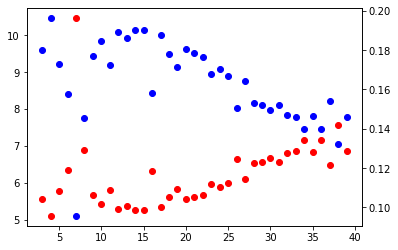

In [272]:
fig, ax1 = plt.subplots()


ax1.scatter(np.add(range(len(results_lambda2[0][3:40])),3),results_lambda2[0][3:40],c ="r")

ax2 = ax1.twinx()
ax2.scatter(np.add(range(len(results_lambda2[0][3:40])),3),1/results_lambda2[0][3:40],c="b")



# axes = plt.gca()
# axes.set_xlim(0,2000)
# axes.set_ylim(4.5,8)

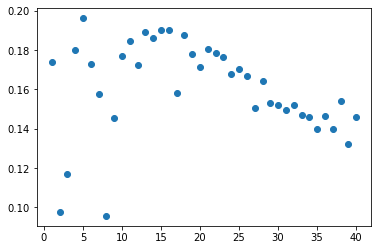

In [261]:
plt.scatter(np.add(range(len(results_lambda2[0][:40])),1),1/results_lambda2[0][:40])
axes = plt.gca()
# axes.set_xlim(0,2000)
# axes.set_ylim(0.13,0.2)

[-4.49777497e-01  8.51467887e+03  3.20461130e+02  1.07213974e+02] [1.69783099e-01 4.10990035e+02 1.29821979e+00 5.37819514e+00]


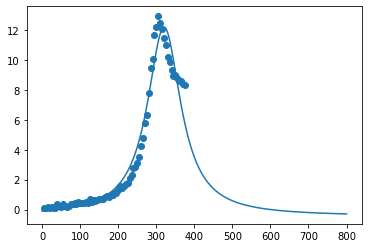

In [163]:

def lorentz(x, y0, amp, cen, wid):
    return y0 + (amp/(2*np.pi))*(wid/(4*(x-cen)**2 + wid**2))

x = r60[0][0:75]
y = r60[1][0:75]
plt.scatter(x,y,zorder=0)


c, cov = curve_fit(lorentz, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

xf = np.linspace(0,800,500)
yf = lorentz(xf, c[0],c[1],c[2],c[3])
plt.plot(xf,yf, label="fit")


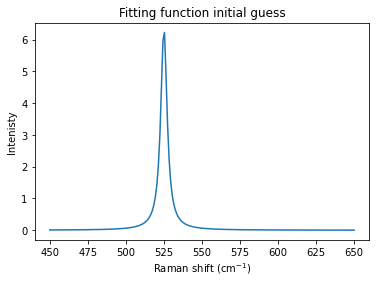

In [130]:
# The Lorentz function https://www.wikiwand.com/en/Cauchy_distribution
def lorentz(x, y0, amp, cen, wid):
    return y0 + (2*amp/np.pi)*(wid/(4*(x-cen)**2 + wid**2))

xtest = np.linspace(450,650,200)
y0 = 0
amp = 50
cen = 525
wid = 5

ytest = lorentz(xtest,y0,amp,cen, wid)
plt.plot(xtest,ytest)
plt.title("Fitting function initial guess")
plt.ylabel("Intenisty")
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.show()

[956.53846154] [174.96090027]
[989.51948052] [24.08819847]


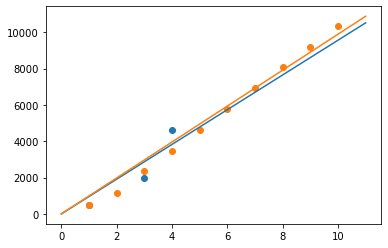

In [92]:


def fit(x,m):
    return m*x 

x = r15oszi[1]
y = r15oszi[0]
plt.scatter(x,y)
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

mo = [c[0],perr[0]]


xf = np.linspace(0,11,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")


x = np.add(range(len(peak_pos1[0:10])),1)
y = peak_pos1[0:10]
plt.scatter(x,y)

    
c, cov = curve_fit(fit, x,y)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

m = [c[0],perr[0]]

xf = np.linspace(0,11,500)
yf = fit(xf, c[0])
plt.plot(xf,yf, label="fit")
           
# x = np.add(range(len(peak_pos2[0:10])),1)
# y = peak_pos2[0:10]
# plt.scatter(x,y)

           
# c, cov = curve_fit(fit, x,y)
# perr = np.sqrt(np.abs(np.diag(cov)))
# print(c,perr)

# xf = np.linspace(0,11,500)
# yf = fit(xf, c[0])
# plt.plot(xf,yf, label="fit")

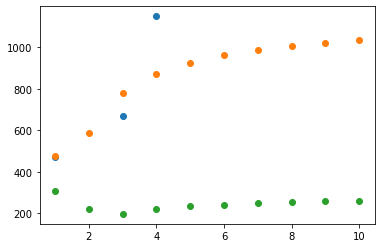

In [75]:
plt.scatter(r15oszi[1], np.divide(r15oszi[0],r15oszi[1]))
plt.scatter(np.add(range(len(peak_pos1[0:10])),1),np.divide(peak_pos1[0:10],np.add(range(len(peak_pos1[0:10])),1)))
plt.scatter(np.add(range(len(peak_pos2[0:10])),1),np.divide(peak_pos2[0:10],np.add(range(len(peak_pos2[0:10])),1)))

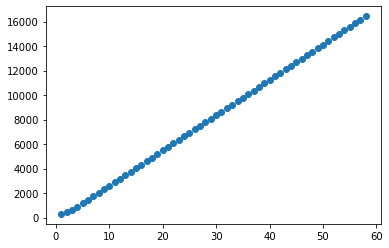

In [117]:
# plt.scatter(r15oszi[1], np.divide(r15oszi[0],r15oszi[1]))
# plt.scatter(np.add(range(len(peak_pos1)),1),np.divide(peak_pos1,np.add(range(len(peak_pos1)),1)))
plt.scatter(np.add(range(len(peak_pos2[0:58])),1),peak_pos2[0:58])

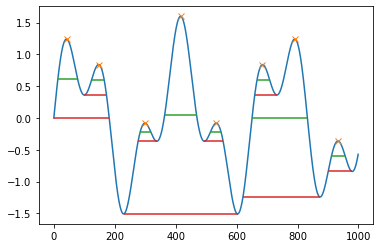

In [232]:
x = np.linspace(0, 6 * np.pi, 1000)
x = np.sin(x) + 0.6 * np.sin(2.6 * x)
peaks, _ = find_peaks(x)
results_half = peak_widths(x, peaks, rel_height=0.5)
results_full = peak_widths(x, peaks, rel_height=1)

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")

## 1.2  der Kugelresonator ohne Zwischenringe

In [280]:
deg0 = pd.read_csv("Data/QM1/Teil2/0deg.dat",sep=' ',decimal=".",header=None)
deg45 = pd.read_csv("Data/QM1/Teil2/45deg.dat",sep=' ',decimal=".",header=None)
deg90 = pd.read_csv("Data/QM1/Teil2/90deg.dat",sep=' ',decimal=".",header=None)
deg180 = pd.read_csv("Data/QM1/Teil2/180deg.dat",sep=' ',decimal=".",header=None)
winkelmessreihen = [deg0,deg45,deg90,deg180]
winkel = [0,45,90,180]

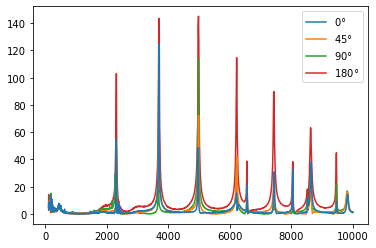

In [295]:
for (x, i) in zip(winkelmessreihen,winkel):
    plt.plot(x[0],x[1],label = f"{i}$\degree$",zorder = -i)
    
plt.legend()
# plt.yscale("log")

### Doppelmax bei 5k

In [312]:
k5deg0 = pd.read_csv("Data/QM1/Teil2/5k-0deg.dat",sep=' ',decimal=".",header=None)
k5deg90 = pd.read_csv("Data/QM1/Teil2/5k-90deg.dat",sep=' ',decimal=".",header=None)
k5deg180 = pd.read_csv("Data/QM1/Teil2/5k-180deg.dat",sep=' ',decimal=".",header=None)
k5WinkelReihe = [k5deg0,k5deg90,k5deg180]
k5winkel = [0,90,180]

# k5main = pd.read_csv("Data/QM1/Teil2/5000Hz2.dat",sep=' ',decimal=".",header=2)
# k5left = pd.read_csv("Data/QM1/Teil2/5k-left.dat",sep=' ',decimal=".",header=2)
# k5left2 = pd.read_csv("Data/QM1/Teil2/5k-left-2.dat",sep=' ',decimal=".",header=2)
# k5orbital = [k5main,k5left,k5left2]

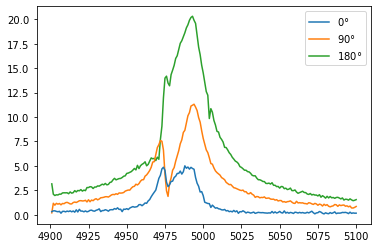

In [315]:
for (x, i) in zip(k5WinkelReihe,k5winkel):
    plt.plot(x[0],x[1],label = f"{i}$\degree$",zorder=-i) 
plt.legend()

## 1.3 der Kugelresonator mit Zwischenringen

In [324]:
r0mm = pd.read_csv("Data/QM1/Teil3/0mm.dat",sep=' ',decimal=".",header=None)
r3mm = pd.read_csv("Data/QM1/Teil3/3mm.dat",sep=' ',decimal=".",header=None)
r6mm = pd.read_csv("Data/QM1/Teil3/6mm.dat",sep=' ',decimal=".",header=None)
r9mm = pd.read_csv("Data/QM1/Teil3/9mm.dat",sep=' ',decimal=".",header=None)
l180 = pd.read_csv("Data/QM1/Teil3/laege-180deg.dat",sep=' ',decimal=".",header=None)
ringMessreihen = [r0mm,r3mm,r6mm,r9mm]
dicken=[0,3,6,9]

(1500.0, 7000.0)

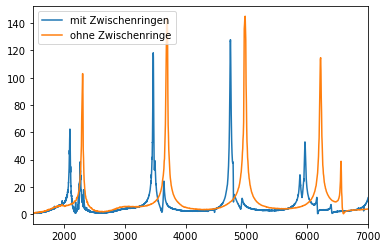

In [374]:
plt.plot(l180[0],l180[1],label="mit Zwischenringen")
plt.plot(deg180[0],deg180[1],label="ohne Zwischenringe")
plt.legend()
axes = plt.gca()
axes.set_xlim(1500,7000)
# axes.set_ylim(0,150)

[10.0, 62.0, 112.0, 170.0]


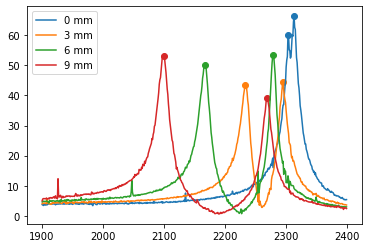

In [376]:
breite = [0]*len(dicken)
for (x, (i,d)) in zip(ringMessreihen,enumerate(dicken)):
    plt.plot(x[0],x[1],label = f"{d} mm") 
    peaks , _ = find_peaks(x[1],height=30,width =1) 
    plt.scatter(x[0][peaks],x[1][peaks])
    breite[i] = x [0][peaks[1]]-x[0][peaks[0]]
plt.legend()

print(breite)
axes = plt.gca()
# axes.set_xlim(2250,2350)
# axes.set_ylim(0,150)

[17.66666667  9.        ] [0.39440531 2.21359436]


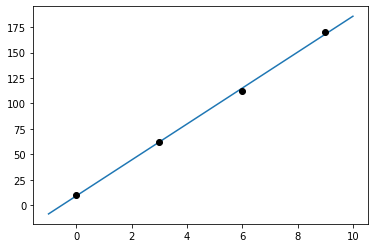

In [387]:
plt.scatter(dicken,breite,c="k")
def gerade(x,m,c):
    return m*x + c

c, cov = curve_fit(gerade, dicken,breite)
perr = np.sqrt(np.abs(np.diag(cov)))
print(c,perr)

m = [c[0],perr[0]]

xf = np.linspace(-1,10,500)
yf = gerade(xf, c[0],c[1])
plt.plot(xf,yf, label="fit",zorder=0)

# Teil 2

## 2.1 Das Wasserstoffmolekul 

In [403]:
b1 = pd.read_csv("Data/QM2/Teil 1/blende1.dat",sep=' ',decimal=".",header=None)
b2 = pd.read_csv("Data/QM2/Teil 1/blende2.dat",sep=' ',decimal=".",header=None)
b3 = pd.read_csv("Data/QM2/Teil 1/blende3.dat",sep=' ',decimal=".",header=None)
b4 = pd.read_csv("Data/QM2/Teil 1/blende4.dat",sep=' ',decimal=".",header=None)
h0 = pd.read_csv("Data/QM2/Teil 1/0deg.dat",sep=' ',decimal=".",header=None)
h180 = pd.read_csv("Data/QM2/Teil 1/180deg.dat",sep=' ',decimal=".",header=None)
bvgl = pd.read_csv("Data/QM2/Teil 1/vergleichsspektrum.dat",sep=' ',decimal=".",header=None)
blenden = [bvgl,b1,b2,b3,b4]
h = [h0,h180]

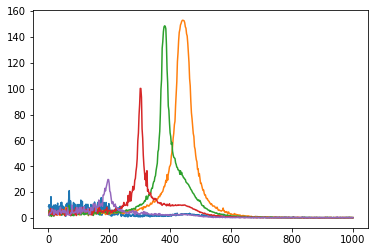

In [404]:
for b in blenden:
    plt.plot(b[0],b[1])

In [ ]:
for x in h:
    plt.plot(x[0],x[1])

## 2.2 Der Rohrresonator mit Blenden

In [562]:
s2 = pd.read_csv("Data/QM2/Teil 2/2segmente.dat",sep=' ',decimal=".",header=None)
s3 = pd.read_csv("Data/QM2/Teil 2/3segmente.dat",sep=' ',decimal=".",header=None)
s4 = pd.read_csv("Data/QM2/Teil 2/4segmente.dat",sep=' ',decimal=".",header=None)
einzel = pd.read_csv("Data/QM2/Teil 2/einzelsegment.dat",sep=' ',decimal=".",header=None)

max12mit = pd.read_csv("Data/QM2/Teil 2/max-12seg-mit.dat",sep=' ',decimal=".",header=None)
max12no8 = pd.read_csv("Data/QM2/Teil 2/max-12seg-no8lang.dat",sep=' ',decimal=".",header=None)
max12ohne = pd.read_csv("Data/QM2/Teil 2/max-12seg-ohne.dat",sep=' ',decimal=".",header=None)
max8 = pd.read_csv("Data/QM2/Teil 2/max-8seg.dat",sep=' ',decimal=".",header=None)
segmente= [einzel,s2,s3,s4]
max12 = [max12ohne,max12mit,max12no8]
seg = [1,2,3,4]
laengen = np.multiply(0.075,seg)

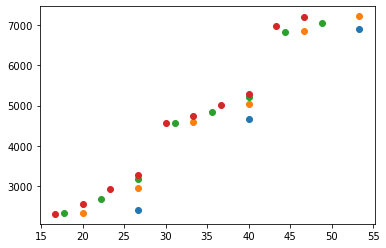

In [567]:
for (i,l,s)  in zip(segmente,laengen,seg):
    x = i[0][300:1600]
    y = i[1][300:1600]
    # plt.plot(x,y)threshold
    peaks , _ = find_peaks(y,width=6,prominence= 30,height=20)
    # plt.scatter(x[peaks] , y[peaks])
    # print(x[peaks])
    plt.scatter(np.add(range(len(x[peaks+300])),1+s)/l,x[peaks+300])
axes = plt.gca()
# axes.set_xlim(-100,4000)
#axes.set_ylim(0,40)

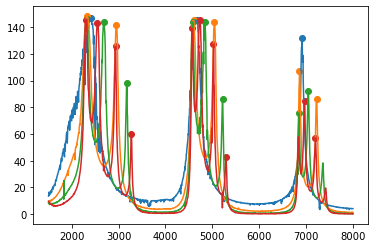

In [565]:
for i  in segmente:
    x = i[0][300:1600]
    y = i[1][300:1600]
    plt.plot(x,y)
    peaks , _ = find_peaks(y,width=6,prominence= 30,height=20)
    plt.scatter(x[peaks+300] , y[peaks+300])
    # print(x[peaks+300])
axes = plt.gca()
# axes.set_xlim(-100,4000)
#axes.set_ylim(0,40)

(-100.0, 4000.0)

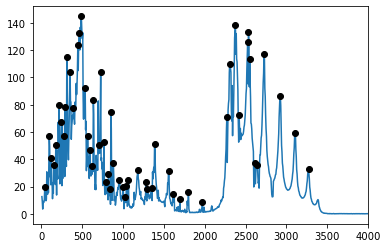

In [576]:
# x=r15[0]
# y=r15[1]
# plt.plot(x,y,zorder=0)

# peaks , _ = find_peaks(y,height=4, width=9) 
# # height = peaks[1]['peak_heights']
# peak_pos_ohne = x[peaks]
# plt.scatter(x[peaks] , y[peaks],c="k")

x=max8[0]
y=max8[1]

plt.plot(x,y,zorder=0)

peaks , _ = find_peaks(y, prominence =4 ,width = 1) 
# height = peaks[1]['peak_heights']
peak_pos_mit = x[peaks]
plt.scatter(x[peaks] , y[peaks],c="k")
axes = plt.gca()
axes.set_xlim(-100,4000)
#axes.set_ylim(0,40)

12
13
18
20
26


(0.0, 2000.0)

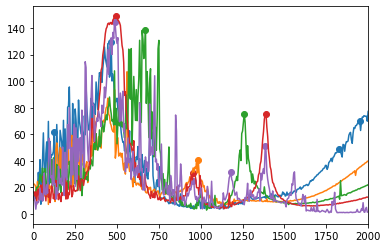

In [466]:
laengen = [0.075,0.075*2,0.075*3,0.075*4,0.075*8]
for (x ,l) in zip (segmente, laengen):
    plt.plot(x[0],x[1])
    peaks , _ = find_peaks(x[1],height=10,width=5,prominence= 5)
    plt.scatter(x[0][peaks] , x[1][peaks])
    print(len(x[0][peaks]))
axes = plt.gca()
axes.set_xlim(0,2000)
#axes.set_ylim(0,40)

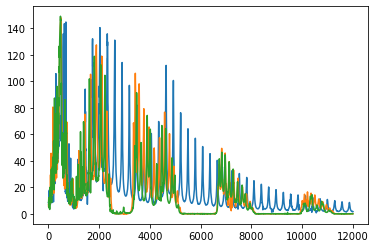

In [430]:
for x in max12:
    plt.plot(x[0],x[1])